In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [3]:
import cv2

In [4]:
import pickle
import random

In [5]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing
import pickle
import random

# visualization
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# tensorflow
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

import os
# print(os.listdir("../input"))

**Function that reads the images to numpy arrays**

In [6]:
def img_to_array(path, category_no, X, y):

  for p in os.listdir(path):
        if p == ".DS_Store":
            continue
        #print(p)
        img = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
        img_np = cv2.resize(img, dsize = (150, 150))
        X.append(img_np)
        y.append(category_no)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path_train="/content/drive/MyDrive/Colab Notebooks/Resources/chest_xray/train/"


category_list = ["NORMAL", "PNEUMONIA"]

X_train = []
y_train = []

for i in range(len(category_list)):
    img_to_array(path_train + category_list[i], i, X_train, y_train)
    
X_train = np.array(X_train).reshape(-1,150,150,1)
y_train = np.array(y_train)

In [10]:
X_train.shape

(5216, 150, 150, 1)

In [11]:
y_train.shape

(5216,)

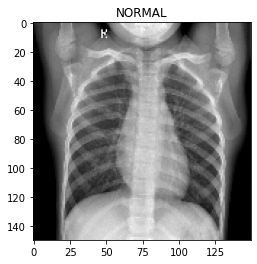

In [ ]:
plt.imshow(X_train[1], cmap = "gray");
plt.title(category_list[y_train[1]]);

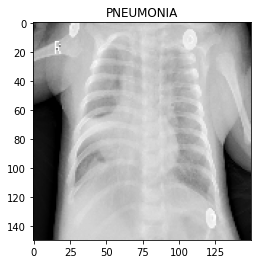

In [ ]:
plt.imshow(X_train[5000], cmap = "gray")
plt.title(category_list[y_train[5000]]);

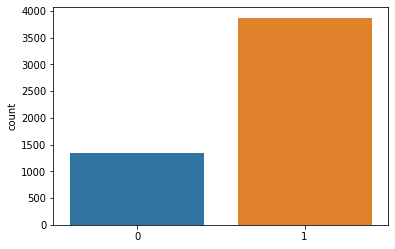

In [11]:
sns.countplot(y_train)

In [12]:
path_val =  "/content/drive/MyDrive/Colab Notebooks/Resources/chest_xray/val/"

X_val = []
y_val = []

for i in range(len(category_list)):
    img_to_array(path_val + category_list[i], i, X_val, y_val)
    
X_val = np.array(X_val).reshape(-1,150,150,1)
y_val = np.array(y_val)

In [13]:
path_test = "/content/drive/MyDrive/Colab Notebooks/Resources/chest_xray/test/"


X_test = []
y_test = []

for i in range(len(category_list)):
    img_to_array(path_test + category_list[i], i, X_test, y_test)
    
X_test = np.array(X_test).reshape(-1,150,150,1)
y_test = np.array(y_test)

In [14]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [15]:
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip = False)  # randomly flip images


datagen.fit(X_train)

In [16]:
model = Sequential([
    Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = "relu"),
    Dropout(0.1),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = "relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation = "relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = "relu"),
    Dropout(0.2),
    Dense(1, activation = "sigmoid")
])

In [17]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [25]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 20, validation_data = datagen.flow(X_val, y_val))

Epoch 1/20
163/163 [==============================] - 255s 2s/step - loss: 0.2413 - accuracy: 0.9103 - val_loss: 0.4184 - val_accuracy: 0.8125
Epoch 2/20
163/163 [==============================] - 251s 2s/step - loss: 0.1795 - accuracy: 0.9310 - val_loss: 2.2694 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 249s 2s/step - loss: 0.1655 - accuracy: 0.9377 - val_loss: 1.8899 - val_accuracy: 0.5625
Epoch 4/20
163/163 [==============================] - 249s 2s/step - loss: 0.1480 - accuracy: 0.9471 - val_loss: 0.4996 - val_accuracy: 0.8125
Epoch 5/20
163/163 [==============================] - 247s 2s/step - loss: 0.1474 - accuracy: 0.9417 - val_loss: 2.1179 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 249s 2s/step - loss: 0.1381 - accuracy: 0.9496 - val_loss: 1.3796 - val_accuracy: 0.5625
Epoch 7/20
163/163 [==============================] - 248s 2s/step - loss: 0.1351 - accuracy: 0.9496 - val_loss: 0.8109 - val_accuracy: 0.6250

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 72, 72, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [28]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))

20/20 [==============================] - 6s 300ms/step - loss: 0.5356 - accuracy: 0.8526
Accuracy: 85.26
